In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv(r"exoplanet_catalogue.csv")
print(len(df))
column_list = df.columns.tolist()

features = ["name","mass", "radius", "orbital_period", "semi_major_axis", "eccentricity", "inclination", "discovered", "omega", "star_distance", "star_mass", "star_radius", "star_age", "star_teff"]
features = ["mass", "radius", "orbital_period", "semi_major_axis", "discovered", "star_distance", "star_mass", "star_radius", "star_teff"]

det_types = ["Primary Transit",
             "Radial Velocity",
             "Imaging",
             "Microlensing",
             "Timing",
             "Astrometry",]

7408


In [2]:
unique_names_freq = df['detection_type'].value_counts()
print("\nUnique Names with Frequencies:")
print(unique_names_freq)


Unique Names with Frequencies:
detection_type
Primary Transit                         4491
Radial Velocity                         1137
Imaging                                  932
Microlensing                             313
Timing                                   160
Radial Velocity, Astrometry               99
Imaging, Astrometry                       48
Astrometry                                47
Imaging, Other                            46
Other                                     42
TTV                                       32
Timing, Kinematic                         10
Radial Velocity, Primary Transit           7
Primary Transit, Radial Velocity           7
Timing, Other                              6
Imaging, Other, Kinematic                  5
Imaging, Kinematic                         5
Radial Velocity, Imaging                   4
Astrometry, Radial Velocity                2
Primary Transit, TTV                       2
Astrometry, Radial Velocity, Imaging       1
Other, I

In [3]:
new_rows = []

df_drop = df[["detection_type"] + features].copy()
for i in det_types:
    for index, row in df_drop.iterrows():
        if i in row['detection_type']:
            new_row = row
            new_row['detection_type'] = i
            new_rows.append(new_row)

In [4]:
df1 = pd.DataFrame(new_rows)
print(len(df1))

column_list = df1.columns.tolist()
for i in range(len(column_list)):
    print(f"{i}: {column_list[i]}", end = "\n")

7509
0: detection_type
1: mass
2: radius
3: orbital_period
4: semi_major_axis
5: discovered
6: star_distance
7: star_mass
8: star_radius
9: star_teff


In [5]:
def count_nan_per_column(df):
  """
  Calculates and displays the number of NaN (Not a Number) values
  in each column of a pandas DataFrame.

  Args:
    df: The pandas DataFrame to inspect.

  Returns:
    None. Prints the NaN count for each column.
  """
  print("NaN Value Counts per Column:")
  for col in df.columns:
    nan_count = df[col].isnull().sum()
    print(f"Column '{col}': {nan_count} NaN values")

# Call the function to count NaNs
count_nan_per_column(df1)


NaN Value Counts per Column:
Column 'detection_type': 0 NaN values
Column 'mass': 2956 NaN values
Column 'radius': 2534 NaN values
Column 'orbital_period': 1325 NaN values
Column 'semi_major_axis': 2290 NaN values
Column 'discovered': 0 NaN values
Column 'star_distance': 367 NaN values
Column 'star_mass': 1266 NaN values
Column 'star_radius': 1701 NaN values
Column 'star_teff': 1513 NaN values


In [7]:
df_drop = df1.dropna().copy()
print(len(df_drop))

print(df_drop.head(10))

unique_names_freq = df_drop['detection_type'].value_counts()
print("\nUnique Names with Frequencies:")
print(unique_names_freq)

1362
      detection_type      mass  radius  orbital_period  semi_major_axis  \
314  Primary Transit   0.02703  0.1737        0.736548         0.015439   
349  Primary Transit   0.02800  0.4273        8.463446         0.070000   
350  Primary Transit   0.10100  2.7900       18.859023         0.119000   
372  Primary Transit   0.07000  0.2300       41.685500         0.241000   
468  Primary Transit   2.75000  0.9700       13.240600         0.105500   
469  Primary Transit   2.33000  1.4300        2.994325         0.043510   
470  Primary Transit   0.91700  1.4400        2.828052         0.040160   
471  Primary Transit   1.30800  0.8850        4.035091         0.051000   
472  Primary Transit   7.60000  1.0900        1.512140         0.027000   
473  Primary Transit  63.40000  1.1200        3.060360         0.045000   

     discovered  star_distance  star_mass  star_radius  star_teff  
314        2004        12.5855      0.900        0.963     5250.0  
349        2020         9.7900   

In [6]:
def count_complete_rows_in_columns(df, column_list):
    """
    Counts the number of rows in a DataFrame where none of the specified
    columns have NaN values.

    Args:
    df (pd.DataFrame): The input pandas DataFrame.
    column_list (list): A list of column names to check for NaN values.

    Returns:
    int: The number of rows where all specified columns have non-NaN values.
    """
    if not all(col in df.columns for col in column_list):
        raise ValueError("One or more columns in the provided list do not exist in the DataFrame.")

    # Select the specified columns
    subset_df = df[column_list]

    # Check for rows where all values in the subset are not NaN
    complete_rows_mask = ~subset_df.isnull().any(axis=1)

    # Count the number of True values in the mask
    complete_rows_count = complete_rows_mask.sum()

    return complete_rows_count

def count_rows_with_all_nan_in_columns(df, column_list):
    """
    Counts the number of rows in a DataFrame where all of the specified
    columns have NaN values.

    Args:
    df (pd.DataFrame): The input pandas DataFrame.
    column_list (list): A list of column names to check for NaN values.

    Returns:
    int: The number of rows where all specified columns have NaN values.
    """
    if not all(col in df.columns for col in column_list):
        raise ValueError("One or more columns in the provided list do not exist in the DataFrame.")

    # Select the specified columns
    subset_df = df[column_list]

    # Check for rows where all values in the subset are NaN
    all_nan_rows_mask = subset_df.isnull().all(axis=1)

    # Count the number of True values in the mask
    all_nan_rows_count = all_nan_rows_mask.sum()

    return all_nan_rows_count

# Call the function to count NaNs
# col_to_check = ["star_mass", "star_radius","star_teff"]
col_to_check = ["orbital_period", "semi_major_axis"]
print(count_complete_rows_in_columns(df1, col_to_check))

print(count_rows_with_all_nan_in_columns(df1, col_to_check))

4610
716


In [7]:
unique_names_freq = df1['detection_type'].value_counts()
print("\nUnique Names with Frequencies:")
print(unique_names_freq)


Unique Names with Frequencies:
detection_type
Primary Transit    4509
Radial Velocity    1260
Imaging            1047
Microlensing        313
Astrometry          202
Timing              178
Name: count, dtype: int64


In [ ]:
# df1.to_csv('exo-det_type.csv', index=False)

2450
-2.0
279.0


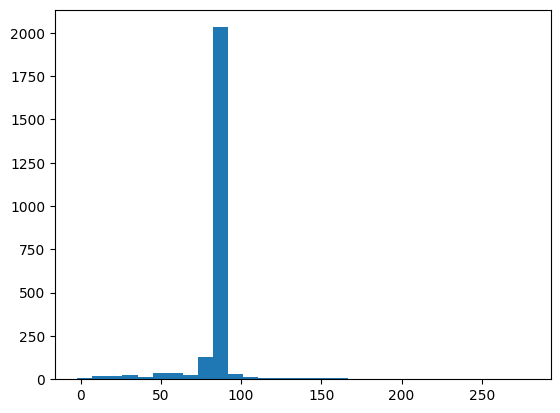

In [14]:
# angle of inclination range
dfi = df[['detection_type',"inclination"]].copy()
dfi = dfi.dropna().copy()

print(len(dfi))

i = dfi['inclination'].tolist()

print(min(i))
print(max(i))

plt.hist(i,bins =30)
plt.show()

In [ ]:
print